# 第7章 畳み込みニューラルネットワーク
## 7.4 Convolution/Poolingレイヤの実装
### 7.4.1 4次元配列

In [2]:
import numpy as np

x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [3]:
print(x[0].shape)
print(x[1].shape)

(1, 28, 28)
(1, 28, 28)


In [4]:
x[0, 0]

array([[3.81841724e-01, 9.21688315e-01, 7.13479638e-01, 4.03975866e-01,
        2.47272929e-02, 9.33234599e-01, 4.72548165e-01, 4.80270635e-01,
        6.06170591e-01, 5.39097618e-01, 6.30718503e-01, 7.67137970e-01,
        4.62666404e-02, 8.34090028e-02, 9.88267256e-01, 4.53031599e-01,
        7.37259002e-01, 9.46756709e-01, 3.76956121e-02, 6.39452234e-01,
        8.84295749e-01, 7.56347427e-01, 2.36810941e-01, 4.11960020e-01,
        9.93641198e-01, 9.02448495e-01, 8.83269952e-01, 2.63095906e-01],
       [3.34645831e-01, 5.74765639e-01, 4.78893115e-01, 7.04596692e-02,
        9.91693819e-01, 2.53412924e-01, 4.41543743e-01, 2.31672105e-01,
        4.68257446e-01, 3.29319949e-02, 3.94932653e-01, 2.99105259e-01,
        3.38054457e-01, 5.14514783e-02, 6.08501217e-01, 3.62309639e-01,
        5.66693325e-01, 7.82823899e-01, 8.41550659e-01, 1.04753073e-01,
        7.90814503e-01, 5.22267350e-01, 4.71800858e-01, 5.24236854e-01,
        6.85512518e-02, 4.72545439e-01, 1.97469484e-01, 9.18471

### 7.4.3 Convolutionレイヤの実装

In [5]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


In [6]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

### 7.4.4 Poolingレイヤの実装

In [7]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride. self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        out = np.max(col, axis=1)

        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

## 7.5 CNNの実装

In [4]:
%run gradient_check.py

W1 1.6475313588914166e-07
b1 6.5640584648743e-07
W2 4.366084291081634e-11
b2 3.798994543165873e-09
W3 8.311004440229376e-11
b3 1.798978471398427e-07


train loss:2.300329029724576
=== epoch:1, train acc:0.166, test acc:0.165 ===
train loss:2.2979123809655637
train loss:2.293648709703393
train loss:2.2876756100813633
train loss:2.28059800114541
train loss:2.2793475764833557
train loss:2.2602953918077633
train loss:2.2556133882502767
train loss:2.237228965443758
train loss:2.200266057325715
train loss:2.15577124618465
train loss:2.139767396338382
train loss:2.149746840914625
train loss:2.0638368951508457
train loss:2.0103177763601816
train loss:1.9518295363562457
train loss:1.8997135636842228
train loss:1.8818674951088676
train loss:1.7608238709569302
train loss:1.710223954653668
train loss:1.542896096030364
train loss:1.5677377535793895
train loss:1.5661908821409753
train loss:1.2973267067978205
train loss:1.230311994859199
train loss:1.2607322110773727
train loss:1.102093113142908
train loss:1.2379015411905092
train loss:1.1681417204857845
train loss:1.0148826314943227
train loss:0.8523037464701553
train loss:0.9374448871460116
train

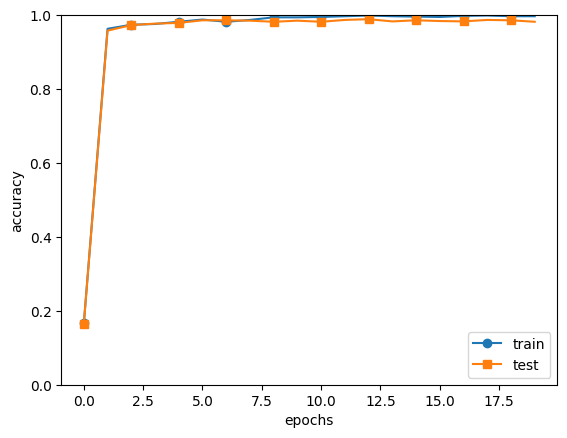

In [1]:
%run train_convnet.py

## 7.6 CNNの可視化
### 7.6.1 1層目の重みの可視化

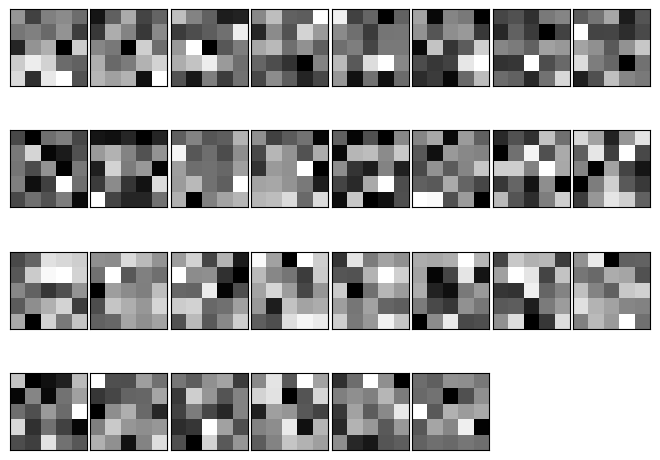

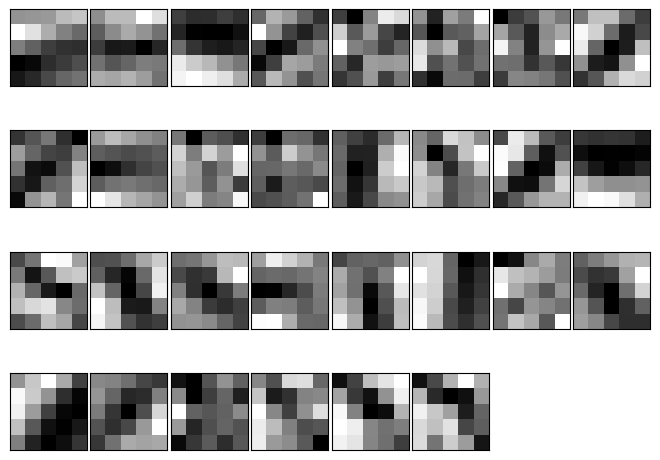

In [3]:
%run visualize_filter.py